### Importing library used

In [404]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [405]:
df = pd.read_csv("dataset/car-dataset.csv")
df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [406]:
df.drop(['name'],axis=1,inplace=True)

In [407]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [408]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           4340 non-null   int64 
 1   selling_price  4340 non-null   int64 
 2   km_driven      4340 non-null   int64 
 3   fuel           4340 non-null   object
 4   seller_type    4340 non-null   object
 5   transmission   4340 non-null   object
 6   owner          4340 non-null   object
dtypes: int64(3), object(4)
memory usage: 237.5+ KB


Text(0, 0.5, 'Price in thousand dollars ($)')

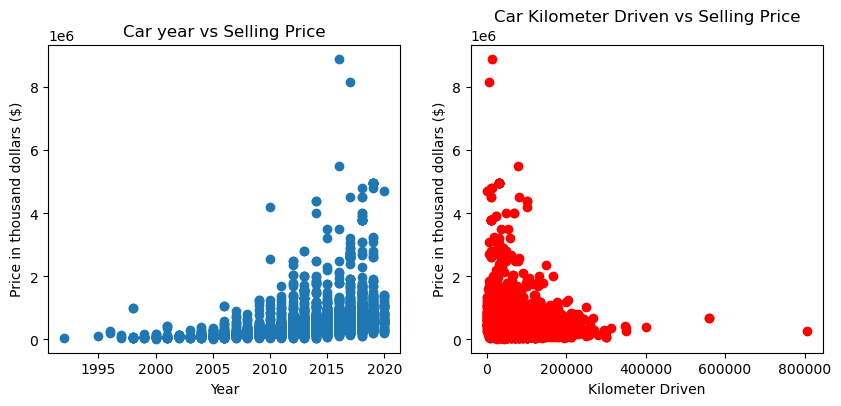

In [409]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(df['year'],df['selling_price'])
plt.title("Car year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Price in thousand dollars ($)")

plt.subplot(1,2,2)
plt.scatter(df['km_driven'],df['selling_price'],color='r')
plt.title("Car Kilometer Driven vs Selling Price")
plt.xlabel("Kilometer Driven")
plt.ylabel("Price in thousand dollars ($)")


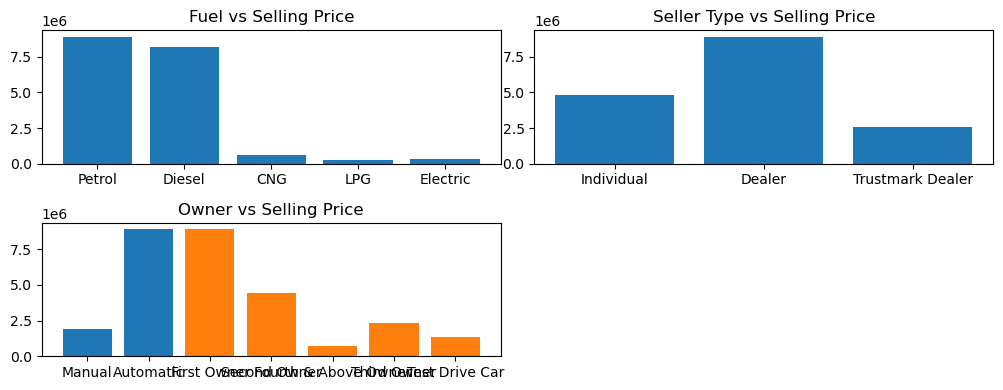

In [410]:
plt.figure(figsize=(10,4))

plt.subplot(2,2,1)
plt.bar(df['fuel'],df['selling_price'])
plt.title("Fuel vs Selling Price")

plt.subplot(2,2,2)
plt.bar(df['seller_type'],df['selling_price'])
plt.title("Seller Type vs Selling Price")

plt.subplot(2,2,3)
plt.bar(df['transmission'],df['selling_price'])
plt.title("Transmission vs Selling Price")

plt.subplot(2,2,3)
plt.bar(df['owner'],df['selling_price'])
plt.title("Owner vs Selling Price")

plt.tight_layout()
plt.show()

In [411]:
X = df.drop(['selling_price'],axis=1)
y = df['selling_price']

In [507]:
X['year'] = (X['year']-(X['year']).min())/(X['year'].max()-X['year'].min())
X['km_driven'] = (X['km_driven']-(X['km_driven']).min())/(X['km_driven'].max()-X['km_driven'].min())
y = (y-(y).min())/(y.max()-y.min())


In [508]:
y

0       0.004505
1       0.012950
2       0.065315
3       0.025901
4       0.048423
          ...   
4335    0.043919
4336    0.043919
4337    0.010135
4338    0.095158
4339    0.023086
Name: selling_price, Length: 4340, dtype: float64

In [509]:
X.describe()

,year,km_driven,fuel,seller_type,transmission,owner
count,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000,4340.000000
mean,0.753242,0.082091,1.531336,1.276037,1.103226,1.517972
std,0.150548,0.057828,0.549621,0.496892,0.304289,0.868596
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.678571,0.043391,1.000000,1.000000,1.000000,1.000000
50%,0.785714,0.074385,2.000000,1.000000,1.000000,1.000000
75%,0.857143,0.111579,2.000000,2.000000,1.000000,2.000000
max,1.000000,1.000000,5.000000,3.000000,2.000000,5.000000


In [510]:
print(X['owner'].value_counts())

owner
1    2832
2    1106
4     304
3      81
5      17
Name: count, dtype: int64


In [511]:
print(X['seller_type'].value_counts())

seller_type
1    3244
2     994
3     102
Name: count, dtype: int64


In [512]:
print(X['transmission'].value_counts())

transmission
1    3892
2     448
Name: count, dtype: int64


In [513]:
print(X['fuel'].value_counts())

fuel
2    2153
1    2123
3      40
4      23
5       1
Name: count, dtype: int64


In [514]:
X['transmission'].value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       1
       ..
4335    1
4336    1
4337    1
4338    1
4339    1
Name: transmission, Length: 4340, dtype: int64>

In [515]:
for col in ['seller_type', 'fuel', 'transmission', 'owner']:
    X[col] = pd.factorize(X[col])[0] + 1

In [516]:
paramWeight = np.ones(len(X.columns))
paramBias = 40000

print(paramWeight)
print(paramBias)

[1. 1. 1. 1. 1. 1.]
40000


In [517]:
np.dot(paramWeight,X.iloc[0])+b

25481.64384312506

In [518]:
def mse(X,y,w,b):
    error = 0
    X = np.array(X)
    for i in range(len(X)):
        prediction = np.dot(w,X[i])+b
        error += (prediction-y[i])**2
    error/=(2*len(X))
    return error

In [519]:
mse(X,y,paramWeight,paramBias)

800248395.3462121

In [520]:
def hitung_gradient(X,y,w,b):
    dj_dw = 0
    dj_db = 0
    X = np.array(X)
    for i in range(len(X)):
        error = (np.dot(w,X[i])+b)-y[i]
        dj_dw += error*X[i]
        dj_db += error
    dj_dw/=len(X)
    dj_db/=len(X)

    return dj_dw,dj_db

In [521]:
dj_dw,dj_db = hitung_gradient(X,y,paramWeight,paramBias)
dj_dw,dj_db

(array([30134.35908929,  3284.18215951, 61263.28995101, 51049.58853416,
        44135.98417897, 60728.94447662]),
 40006.209386274524)

In [522]:
def gradient_descent(X,y,w,b,epochs=500,alpha=0.0001):
    w_baru = w
    b_baru = b
    loss_hist = []
    param_hist = []
    for i in range(epochs):
        dj_dw,dj_db = hitung_gradient(X,y,w_baru,b_baru)
        w_baru = w_baru - alpha*dj_dw
        b_baru = b_baru - alpha*dj_db
        loss = mse(X,y,w_baru,b_baru)
        loss_hist.append(loss)
        param_hist.append([w_baru,b_baru])
        if i%500 == 0:
            print(f"Epochs {i}, Loss = {loss}")
    
    print(f"Final Loss = {loss}, parameters = {w_baru},{b_baru}")
    return loss_hist,param_hist,w_baru,b_baru

In [523]:
loss_hist,param_hist,w,b = gradient_descent(X,y,paramWeight,paramBias,epochs=5000,alpha=0.01)

Epochs 0, Loss = 661895497.6958688
Epochs 500, Loss = 12160143.303193228
Epochs 1000, Loss = 8306300.980961054
Epochs 1500, Loss = 6113799.221384228
Epochs 2000, Loss = 4719480.362036162
Epochs 2500, Loss = 3768748.809936961
Epochs 3000, Loss = 3088936.3248445434
Epochs 3500, Loss = 2584896.4837050275
Epochs 4000, Loss = 2199528.48054052
Epochs 4500, Loss = 1896697.3372293215
Final Loss = 1653223.8641349024, parameters = [-10250.51423495  -2369.85831423   -632.99371832   -682.90898994
  -2259.02732487  -1189.55195505],14242.90680808257


In [ ]:
X_onehot = pd.get_dummies(df.drop('selling_price',axis=1))
X_onehot
paramWeightOneHot = np.ones(X_onehot.shape[1])
paramBiasOneHot = 10000

gradient_descent(X_onehot,y,paramWeightOneHot,paramBiasOneHot,epochs=1000,alpha=0.001)

Epochs 0, Loss = 1.4265624403131954e+24


C:\Users\Sanju\AppData\Local\Temp\ipykernel_19972\2922592775.py:6: RuntimeWarning: overflow encountered in scalar power
  error += (prediction-y[i])**2
C:\Users\Sanju\AppData\Local\Temp\ipykernel_19972\1268968297.py:7: RuntimeWarning: overflow encountered in multiply
  dj_dw += error*X[i]
C:\Users\Sanju\AppData\Local\Temp\ipykernel_19972\1268968297.py:8: RuntimeWarning: overflow encountered in scalar add
  dj_db += error
C:\Users\Sanju\AppData\Local\Temp\ipykernel_19972\1268968297.py:7: RuntimeWarning: overflow encountered in add
  dj_dw += error*X[i]


Epochs 500, Loss = nan


KeyboardInterrupt: 

In [491]:
def predict(X,w,b):
    return np.dot(w,X)+b

In [477]:
prediksi = predict(X.iloc[100],w,b) 
print(f"Target: {y[100]}")
print(f"Prediksi: {prediksi}")

Target: 210000
Prediksi: 961866.6747685225


In [474]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(X)

In [449]:
pd.DataFrame(X_poly)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.535714,0.086783,1.0,1.0,1.0,1.0,0.286990,0.046491,0.535714,0.535714,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.535714,0.061988,1.0,1.0,1.0,1.0,0.286990,0.033208,0.535714,0.535714,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.714286,0.123976,2.0,1.0,1.0,1.0,0.510204,0.088554,1.428571,0.714286,...,4.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
3,0.892857,0.057028,1.0,1.0,1.0,1.0,0.797194,0.050918,0.892857,0.892857,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.785714,0.174807,2.0,1.0,1.0,2.0,0.617347,0.137348,1.571429,0.785714,...,4.0,2.0,2.0,4.0,1.0,1.0,2.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,0.785714,0.099181,2.0,1.0,1.0,2.0,0.617347,0.077928,1.571429,0.785714,...,4.0,2.0,2.0,4.0,1.0,1.0,2.0,1.0,2.0,4.0
4336,0.785714,0.099181,2.0,1.0,1.0,2.0,0.617347,0.077928,1.571429,0.785714,...,4.0,2.0,2.0,4.0,1.0,1.0,2.0,1.0,2.0,4.0
4337,0.607143,0.102900,1.0,1.0,1.0,2.0,0.368622,0.062475,0.607143,0.607143,...,1.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0
4338,0.857143,0.111579,2.0,1.0,1.0,1.0,0.734694,0.095639,1.714286,0.857143,...,4.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0


In [450]:
paramWeightFix = np.zeros(X_poly.shape[1])
paramBiasFix = 40000

In [451]:
paramWeightFix.shape

(27,)

In [452]:
loss_hist,param_hist,w,b = gradient_descent(X_poly,y,paramWeightFix,paramBiasFix,epochs=100,alpha=0.001)

Epochs 0, Loss = 275027838745.3174
Epochs 10, Loss = 275027838745.3174
Epochs 20, Loss = 275027838745.3174
Epochs 30, Loss = 275027838745.3174
Epochs 40, Loss = 275027838745.3174
Epochs 50, Loss = 275027838745.3174
Epochs 60, Loss = 275027838745.3174
Epochs 70, Loss = 275027838745.3174
Epochs 80, Loss = 275027838745.3174
Epochs 90, Loss = 275027838745.3174
Final Loss = 275027838745.3174, parameters = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.],40000.0


In [454]:
np.dot(paramWeightFix,X.iloc[0])+paramBiasFix

ValueError: shapes (27,) and (6,) not aligned: 27 (dim 0) != 6 (dim 0)

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [379]:
X_numeric = X_encoded[['year','km_driven']]

In [380]:
poly_features = PolynomialFeatures(degree=1)
X_poly = poly_features.fit_transform(X_encoded)

In [381]:
len(X_poly[0])

18

In [382]:
print(X_poly[0])
print(X_numeric.iloc[0])

[1.         0.53571429 0.08678301 0.         0.         0.
 0.         1.         0.         1.         1.         0.
 0.         0.         0.         0.         1.         0.        ]
year         0.535714
km_driven    0.086783
Name: 0, dtype: float64


In [383]:
X_encoded.iloc[0]

year                            0.535714
km_driven                       0.086783
fuel_CNG                           False
fuel_Diesel                        False
fuel_Electric                      False
fuel_LPG                           False
fuel_Petrol                         True
transmission_Automatic             False
transmission_Manual                 True
owner_First Owner                   True
owner_Fourth & Above Owner         False
owner_Second Owner                 False
owner_Test Drive Car               False
owner_Third Owner                  False
seller_type_Dealer                 False
seller_type_Individual              True
seller_type_Trustmark Dealer       False
Name: 0, dtype: object

In [384]:
X_poly[0]

array([1.        , 0.53571429, 0.08678301, 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        ])

In [385]:
X_poly = pd.DataFrame(X_poly)
X = pd.concat([X_poly,X_encoded],axis=1)

In [386]:
X.columns = X.columns.astype(str)

In [387]:
X.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', 'year', 'km_driven', 'fuel_CNG',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'transmission_Automatic', 'transmission_Manual', 'owner_First Owner',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'seller_type_Dealer',
       'seller_type_Individual', 'seller_type_Trustmark Dealer'],
      dtype='object')

In [373]:
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=42)

In [374]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [481]:
y_pred = model.predict(X_test)

# Evaluasi model menggunakan MSE dan R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 182146878750.28085
R-squared: 0.40313036014321213


In [486]:
y_pred[101]

671968.1261655057

In [487]:
y_test.iloc[101]

535000